In [48]:
from matplotlib import pyplot as plt
import numpy as np
from aeon.utils.plotting import plot_series
from aeon.datasets import load_airline
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
from aeon.forecasting.arima import ARIMA

In [49]:
y = load_airline()

In [50]:
random_data = np.random.random((y.shape[0], 3))
cols = [f"X{i+1}" for i in range(random_data.shape[1])]
X = pd.DataFrame(data=random_data, columns=cols, index=y.index)
X.head()

,X1,X2,X3
Period,,,
1949-01,0.363425,0.957785,0.988403
1949-02,0.593147,0.036611,0.162847
1949-03,0.161229,0.181751,0.618742
1949-04,0.898429,0.318256,0.600963
1949-05,0.077033,0.704858,0.880378


In [51]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
X_train, X_test = temporal_train_test_split(X, test_size=36)

In [52]:
fh = np.arange(1, 37)

In [53]:
from aeon.forecasting.compose import ForecastX
from aeon.forecasting.var import VAR

In [54]:
forecaster = ForecastX(
    forecaster_X=VAR(),
    forecaster_y=ARIMA(order=(1,1,0), seasonal_order=(0,1,0,12))
)

In [55]:
forecaster.fit(y_train, X=X_train, fh=fh)

ForecastX(forecaster_X=VAR(),
          forecaster_y=ARIMA(order=(1, 1, 0), seasonal_order=(0, 1, 0, 12)))

In [56]:
y_pred = forecaster.predict(fh=fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

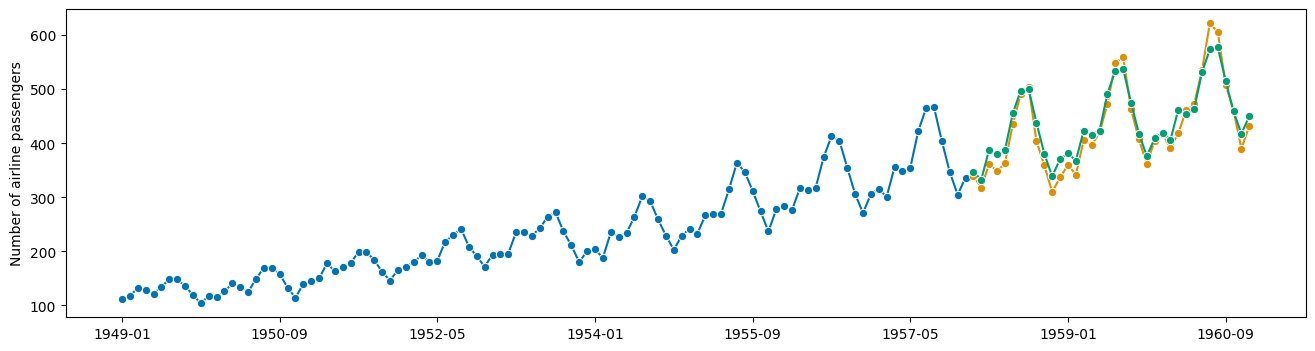

In [57]:
plot_series(y_train, y_test, y_pred)

In [58]:
mean_absolute_percentage_error(y_test, y_pred)

0.044356230687659357